In [2]:
import pandas as pd

In [18]:
import matplotlib.pyplot as plt

In [19]:
import seaborn as sns

Loading data

In [20]:
import os
os.getcwd()

'C:\\Users\\Vivek\\Desktop'

In [21]:
os.chdir('C:\\Users\\Vivek\Desktop')

In [22]:
customers = pd.read_csv("Customers.csv")

In [23]:
products = pd.read_csv("Products.csv")

In [24]:
transactions = pd.read_csv("Transactions.csv")

Inspecting Data

In [25]:
print(customers.head(), customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 None


In [26]:
print(products.head(), products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 None


In [27]:
print(transactions.head(), transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10      

In [28]:
# Data Preprocessing (Handling missing values, datatypes, etc.)
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [29]:

# Handle missing values
customers.fillna('Unknown', inplace=True)
transactions.fillna(0, inplace=True)

In [30]:
# Merge datasets to get full customer and transaction details
merged_data = pd.merge(transactions, customers, on='CustomerID', how='inner')
merged_data = pd.merge(merged_data, products, on='ProductID', how='inner')

EDA

Text(0.5, 1.0, 'Distribution of Product Prices')

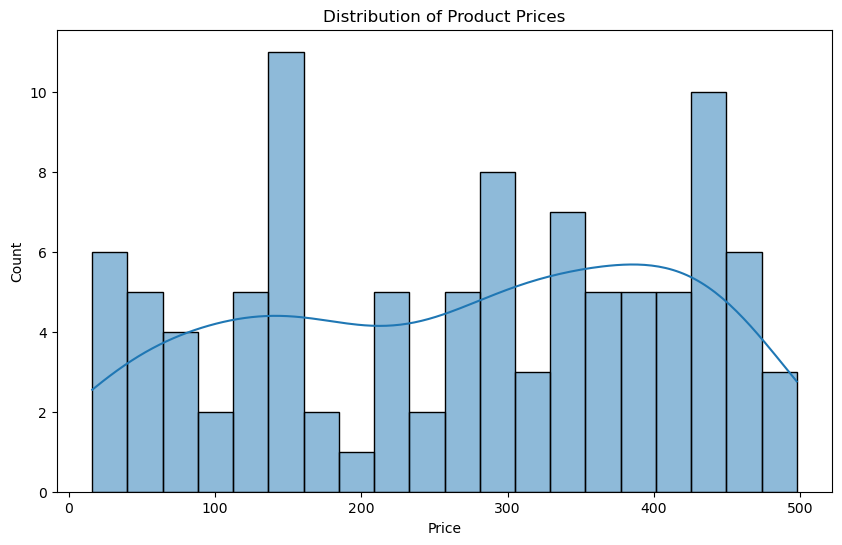

In [31]:
# 1. Distribution of Product Prices
plt.figure(figsize=(10,6))
sns.histplot(products['Price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')


Text(0.5, 1.0, 'Total Transaction Value by Region')

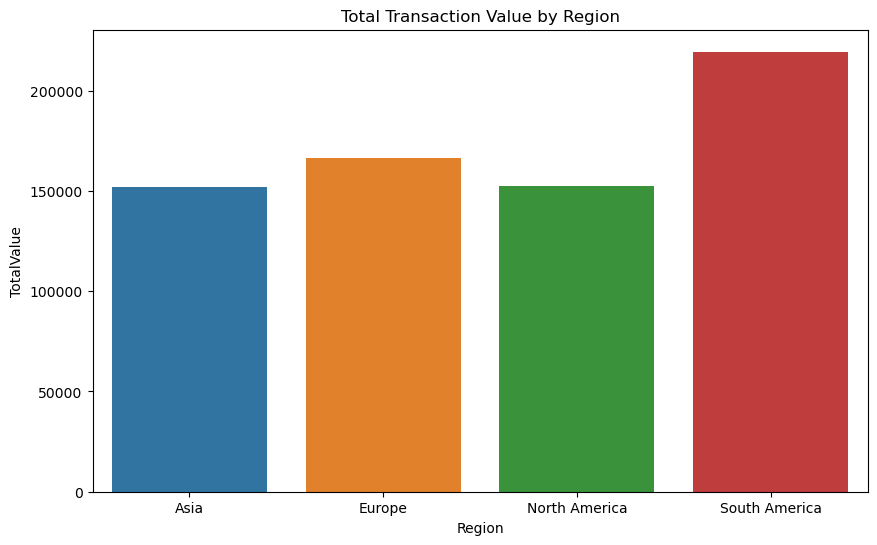

In [32]:
# 2. Total Transaction Value by Region
region_sales = merged_data.groupby('Region')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='TotalValue', data=region_sales)
plt.title('Total Transaction Value by Region')

Text(0.5, 1.0, 'Monthly Transaction Value')

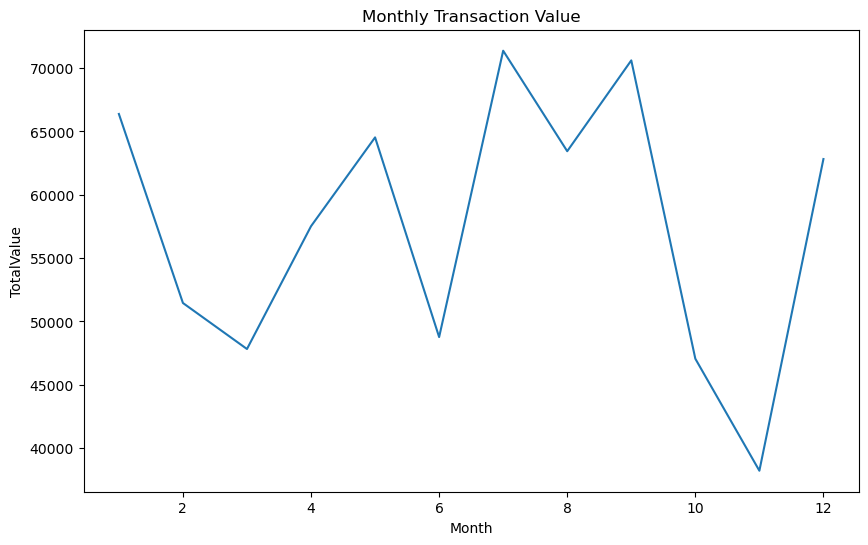

In [33]:
# 3. Transaction Value over Time (Monthly)
merged_data['Month'] = merged_data['TransactionDate'].dt.month
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='TotalValue', data=monthly_sales)
plt.title('Monthly Transaction Value')

Text(0.5, 1.0, 'Customer Purchase Frequency')

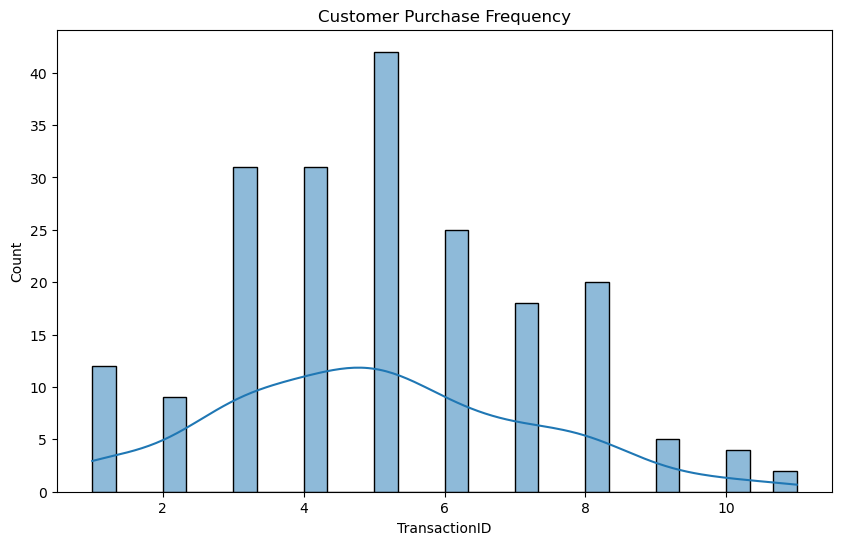

In [34]:
# 4. Customer Purchase Frequency
customer_purchase_freq = merged_data.groupby('CustomerID')['TransactionID'].count().reset_index()
plt.figure(figsize=(10,6))
sns.histplot(customer_purchase_freq['TransactionID'], bins=30, kde=True)
plt.title('Customer Purchase Frequency')

Text(0.5, 1.0, 'Most Popular Product Categories')

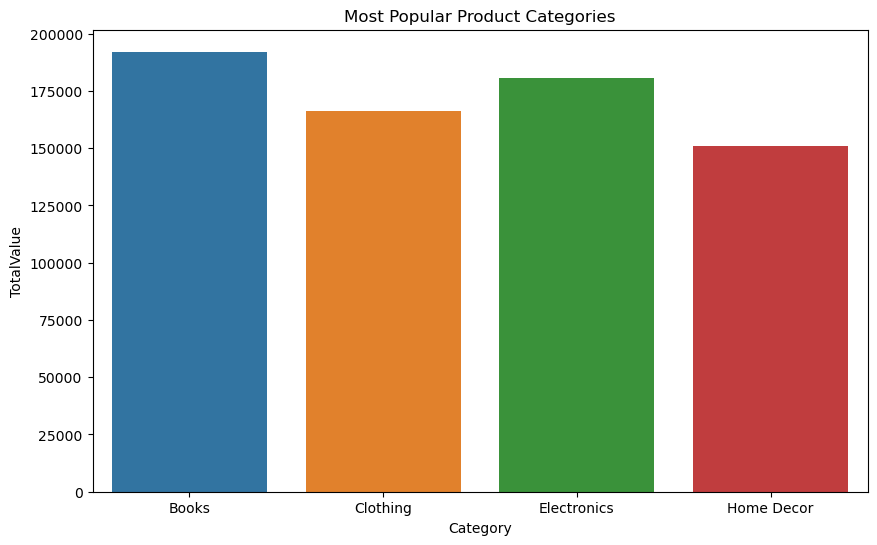

In [35]:
# 5. Most Popular Product Categories
category_sales = merged_data.groupby('Category')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='TotalValue', data=category_sales)
plt.title('Most Popular Product Categories')

Merge data for combined analysis

In [13]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

Top products by sales

In [14]:
top_products = merged_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)

<AxesSubplot:title={'center':'Top 10 Products by Sales'}, xlabel='ProductName'>

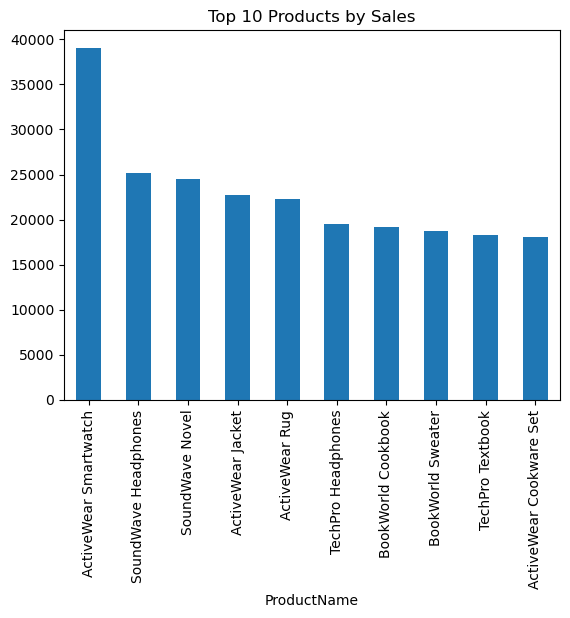

In [15]:
top_products.plot(kind='bar', title='Top 10 Products by Sales')

Transactions over time

In [16]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

<AxesSubplot:title={'center':'Sales Over Time'}, xlabel='TransactionDate'>

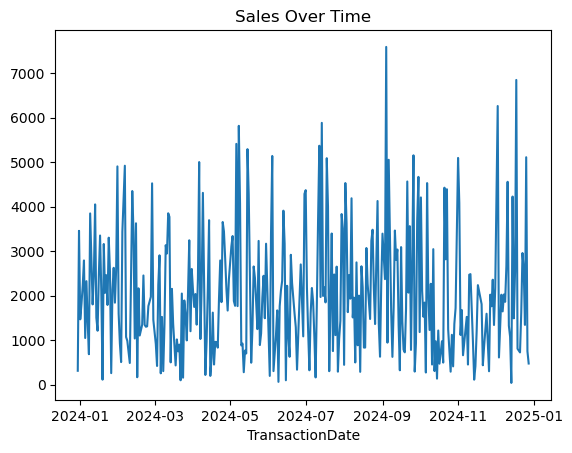

In [17]:
merged_data.groupby(merged_data['TransactionDate'].dt.date)["TotalValue"].sum().plot(title="Sales Over Time")